### Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. 

### To Analyze the dataset and build a reliable model that can predict whether the loan will be a failure or not 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Data Processing

In [2]:
df=pd.read_csv("Loan_default.csv")

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


### Data Analysis

In [5]:
df.shape

(255347, 18)

In [6]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [7]:
df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
df.describe(include='all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
df.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
pd.isna(df).sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [14]:
print("Number of duplicate rows: ", len(df[df.duplicated()]))

Number of duplicate rows:  0


In [15]:
df.nunique()

LoanID            255347
Age                   52
Income            114620
LoanAmount        158729
CreditScore          550
MonthsEmployed       120
NumCreditLines         4
InterestRate        2301
LoanTerm               5
DTIRatio              81
Education              4
EmploymentType         4
MaritalStatus          3
HasMortgage            2
HasDependents          2
LoanPurpose            5
HasCoSigner            2
Default                2
dtype: int64

In [16]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('--'*50)
count_unique_values(df)

I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: LoanID, Length: 255347, dtype: int64 

----------------------------------------------------------------------------------------------------
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64 

----------------------------------------------------------------------------------------------------
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64 

----------------------------------------------------------------------------------------------------
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64 

----------------------------------------------------------------------------------------------------
Yes    127677
No     127670
Name: HasMor

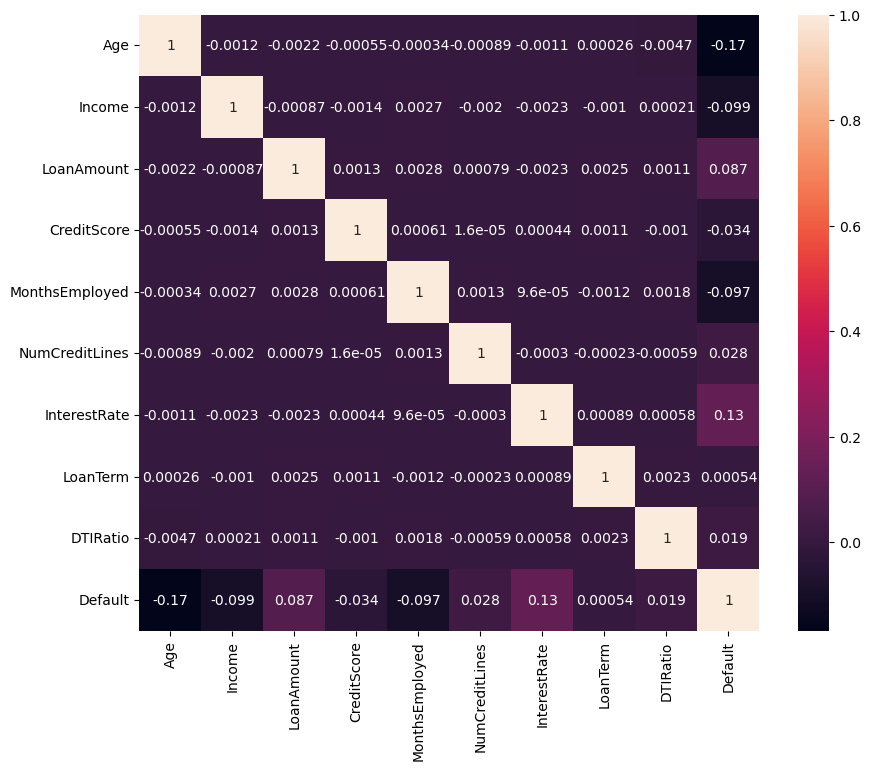

In [17]:
plt.figure(figsize=(10,8))
corr = df.drop(columns=['LoanID','Education', 'EmploymentType', 'MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [18]:
#Default is highly positively correlated to Interest Rate, Loan Amount, NumberCreditLines.
#Default is highly negatively correlated to Age, Income, MonthsEmployed

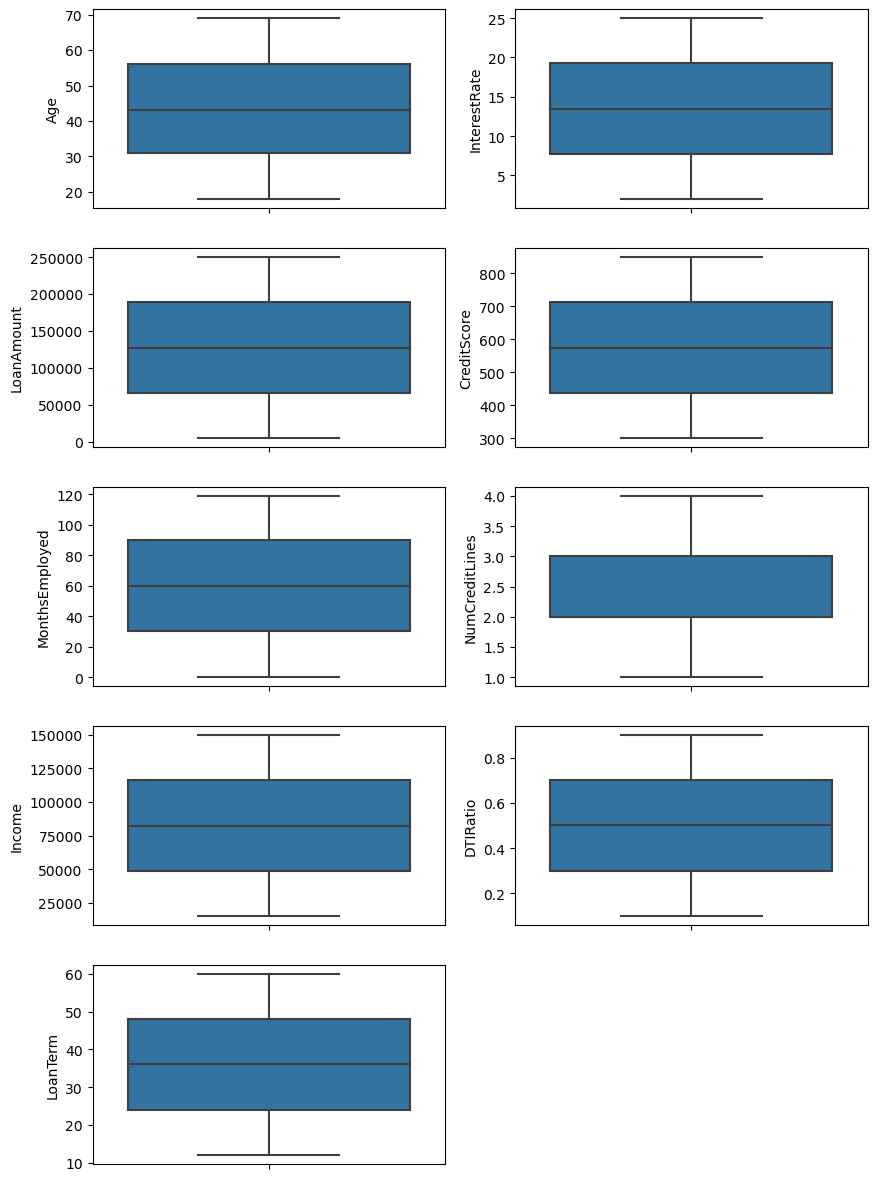

In [19]:
fig=plt.figure(figsize=(10,15))
ax=fig.add_subplot(5,2,1)
sns.boxplot(data=df,y='Age')
ax1=fig.add_subplot(5,2,2)
sns.boxplot(data=df,y='InterestRate')
ax2=fig.add_subplot(5,2,3)
sns.boxplot(data=df,y='LoanAmount')
ax3=fig.add_subplot(5,2,4)
sns.boxplot(data=df,y='CreditScore')
ax4=fig.add_subplot(5,2,5)
sns.boxplot(data=df,y='MonthsEmployed')
ax5=fig.add_subplot(5,2,6)
sns.boxplot(data=df,y='NumCreditLines')
ax6=fig.add_subplot(5,2,7)
sns.boxplot(data=df,y='Income')
ax7=fig.add_subplot(5,2,8)
sns.boxplot(data=df,y='DTIRatio')
ax8=fig.add_subplot(5,2,9)
sns.boxplot(data=df,y='LoanTerm')
plt.show()

### One hot encoding for categorical data`

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df1 = df.copy()
X = df1.drop(['Default', 'LoanID'], axis=1)
Y = df1['Default']

X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)
X_encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,0,1,0,0,0,0,0,0,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,0,0,0,0,0,0,0,1,0,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,...,0,1,0,1,1,0,0,0,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,...,0,0,1,1,1,0,0,0,1,0


In [21]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Education_High School         255347 non-null  uint8  
 10  Education_Master's            255347 non-null  uint8  
 11  Education_PhD                 255347 non-null  uint8  
 12  EmploymentType_Part-time      255347 non-nul

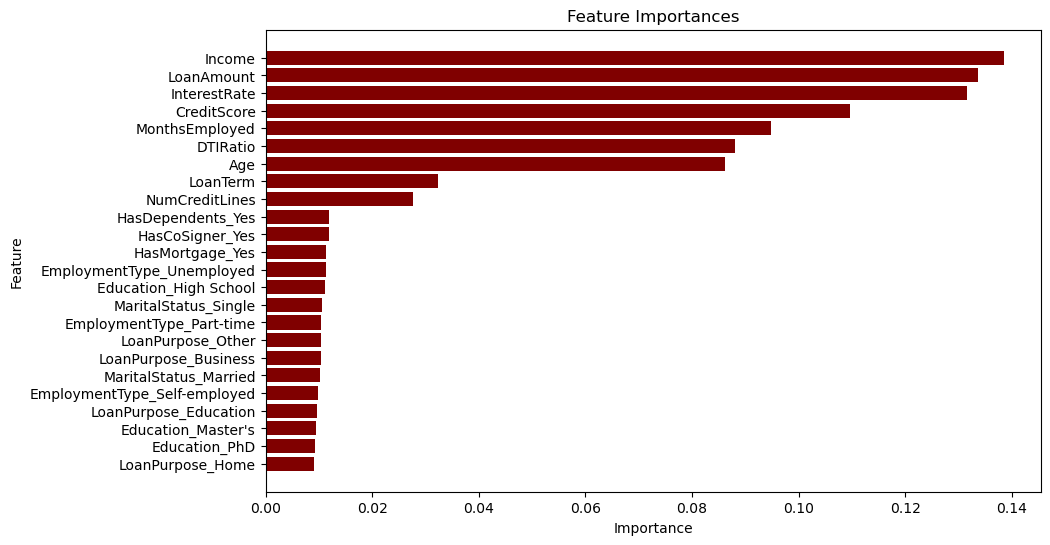

In [22]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_encoded, Y)
feature_importances = rf_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='maroon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

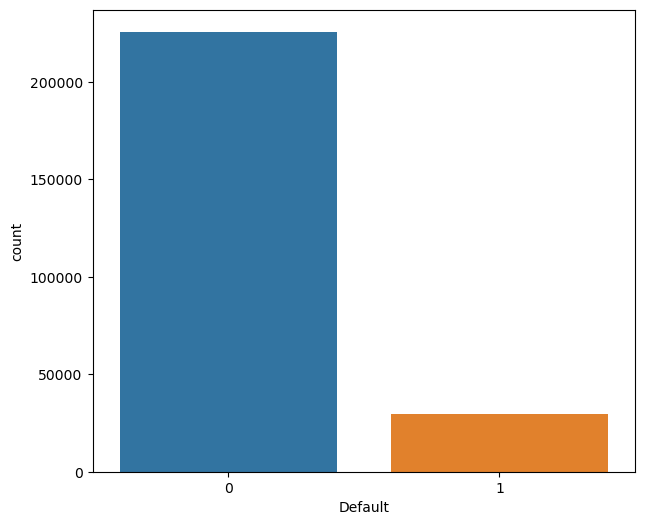

In [23]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['Default'])
plt.show()

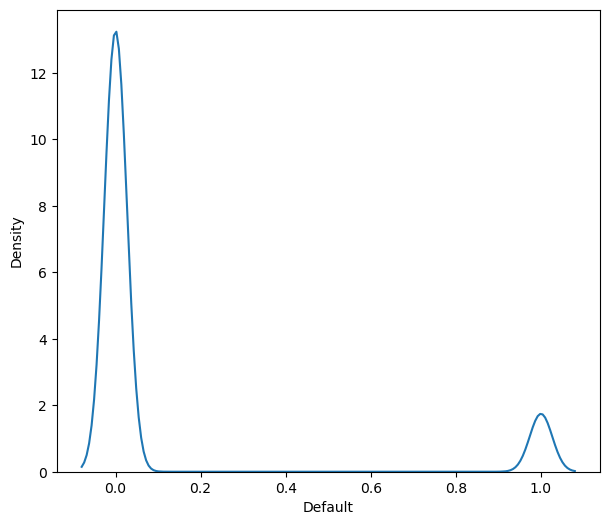

In [24]:
plt.figure(figsize=(7,6))
sns.kdeplot(data=df,x="Default")
plt.show()

In [25]:
X = df1[['InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']]
y = df1['Default']

### Over-sampling the data using SMOTE

In [26]:
y.value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
###for balancing the data we need to apply Synthetic Minority Over-Sampling Technique SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
y_resampled.value_counts(normalize=True)

0    0.5
1    0.5
Name: Default, dtype: float64

### Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y_resampled,test_size=0.30,random_state=42)
model1=LogisticRegression(solver="lbfgs",max_iter=1000)
model1.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [19]:
model1.score(X_train,Y_train)

0.6939972339233664

In [20]:
model1.score(X_test,Y_test)

0.6931847552375255

In [21]:
from sklearn.model_selection import cross_val_score
k = 10

cross_val_scores = cross_val_score(model1,X_scaled,y_resampled, cv=k, scoring='accuracy')

print("Cross-validation scores:", cross_val_scores)

print(f"Mean accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard deviation: {np.std(cross_val_scores):.4f}")


Cross-validation scores: [0.66465806 0.68685616 0.69651521 0.70373734 0.69633798 0.70048074
 0.69857551 0.69729059 0.69608755 0.69497984]
Mean accuracy: 0.6936
Standard deviation: 0.0105


In [36]:
predictions=model1.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.6931847552375255

In [38]:
from sklearn import metrics
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     67673
           1       0.69      0.71      0.70     67744

    accuracy                           0.69    135417
   macro avg       0.69      0.69      0.69    135417
weighted avg       0.69      0.69      0.69    135417



In [39]:
from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(model1, X, y)
print("Cross-validation value:", pred)

Cross-validation value: [0 0 0 ... 0 0 0]


### Classification Models and accuracy reports

In [40]:
from sklearn.tree import DecisionTreeClassifier


In [41]:
model2= DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
model2.score(X_train,Y_train)

1.0

In [43]:
model2.score(X_test,Y_test)

0.8182576781349461

In [44]:
model2_depth=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model2_depth.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
model2_depth.score(X_train,Y_train)

0.6901994170351077

In [46]:
model2_depth.score(X_test,Y_test)

0.688835227482517

In [47]:
model3_depth=DecisionTreeClassifier(max_depth=20)
model3_depth.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20)

In [48]:
model3_depth.score(X_train,Y_train)

0.922628975443949

In [49]:
model3_depth.score(X_test,Y_test)

0.8209825945043827

In [50]:
model4_depth=DecisionTreeClassifier(max_depth=15,criterion='entropy')
model4_depth.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [51]:
model4_depth.score(X_train,Y_train)

0.8561323665779454

In [52]:
model4_depth.score(X_test,Y_test)

0.8262847352991131

In [53]:

pred1=model4_depth.predict(X_test)

In [54]:
accuracy=accuracy_score(Y_test,pred1)


In [55]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, pred1)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.8263
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     67673
           1       0.86      0.78      0.82     67744

    accuracy                           0.83    135417
   macro avg       0.83      0.83      0.83    135417
weighted avg       0.83      0.83      0.83    135417



In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
model_bag=BaggingClassifier(n_estimators=100)
model_bag.fit(X_train,Y_train)
print(model_bag.score(X_train,Y_train))
print(model_bag.score(X_test,Y_test))

KeyboardInterrupt: 

In [ ]:
pred2=model_bag.predict(X_test)
accuracy2=accuracy_score(Y_test,pred2)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, pred2)
print(f"Accuracy: {accuracy2:.4f}")
print("Classification Report:")
print(report)

In [106]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(max_features=8)
model_RF.fit(X_train,Y_train)
print(model_RF.score(X_train,Y_train))
print(model_RF.score(X_test,Y_test))

0.9999873406103724
0.8827104425589106


In [108]:
pred3=model_RF.predict(X_test)
accuracy3=accuracy_score(Y_test,pred3)

In [109]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, pred3)
print(f"Accuracy: {accuracy3:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.8827
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     67673
           1       0.93      0.83      0.88     67744

    accuracy                           0.88    135417
   macro avg       0.89      0.88      0.88    135417
weighted avg       0.89      0.88      0.88    135417



In [110]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(max_features=8,criterion='entropy',max_depth=15)
model_RF.fit(X_train,Y_train)
print(model_RF.score(X_train,Y_train))
print(model_RF.score(X_test,Y_test))

0.8705988840748043
0.8454994572321053


In [111]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(criterion='entropy',max_depth=20)
model_RF.fit(X_train,Y_train)
print(model_RF.score(X_train,Y_train))
print(model_RF.score(X_test,Y_test))

0.927949083934918
0.8519092876079074


In [113]:
from sklearn.neighbors import KNeighborsClassifier


In [115]:
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train,Y_train)
print(model_KNN.score(X_train,Y_train))
print(model_KNN.score(X_test,Y_test))

C:\Users\OM ROPE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8471188811631447


C:\Users\OM ROPE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7702282578996729


In [117]:
pred4=model_KNN.predict(X_test)
accuracy4=accuracy_score(Y_test,pred4)
report = classification_report(Y_test, pred4)
print(f"Accuracy: {accuracy4:.4f}")
print("Classification Report:")
print(report)

C:\Users\OM ROPE\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7702
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     67673
           1       0.72      0.87      0.79     67744

    accuracy                           0.77    135417
   macro avg       0.78      0.77      0.77    135417
weighted avg       0.78      0.77      0.77    135417



### We conclude that the Bagging classifier has the best accuracy 0.8830

### And then the Random Forest classifier has the accuracy of 0.8827, Decision tree classifier has the accuracy of 0.8262 and the KNN classifier has the least accuracy of 0.7702

In [23]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/99.7 MB ? eta -:--:--
                                              0.3/99.7 MB 6.3 MB/s eta 0:00:16
                                              0.7/99.7 MB 7.2 MB/s eta 0:00:14
                                              1.1/99.7 MB 7.6 MB/s eta 0:00:14
                                              1.4/99.7 MB 7.6 MB/s eta 0:00:13
                                              1.9/99.7 MB 7.9 MB/s eta 0:00:13
                                              2.2/99.7 MB 8.3 MB/s eta 0:00:12
     -                                        2.6/99.7 MB 8.0 MB/s eta 0:00:13
     -                                        3.0/99.7 MB 8.0 MB/s eta 0:00:13
     -                                        3.4/99.7 MB 8.1 MB/s eta 0:00:12
     -                                        3.8/99.7 MB 8.0 MB/s eta 0:00:12
     -                                        4.2/99.7 MB 8.

In [34]:
import xgboost as xgb

# Create XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.89
Precision: 0.95
Recall: 0.82


In [38]:
# 1. Take input from the user
user_input = {}
for column in ['InterestRate', 'Income', 'LoanAmount', 'Age', 'CreditScore',
          'MonthsEmployed', 'DTIRatio', 'LoanTerm', 'NumCreditLines']:
    user_value = input(f"Enter {column}: ")
    
    # Automatically detect and convert data type
    try:
        user_input[column] = float(user_value)
    except ValueError:
        user_input[column] = user_value

# 2. Create a dictionary and DataFrame
user_df = pd.DataFrame([user_input])

# 3. Apply one-hot encoding
#user_df_encoded = pd.get_dummies(user_df, columns=user_df.select_dtypes(include=['object']).columns, drop_first=True)

# Ensure that the user input has the same columns as the training data
# missing_columns = set(X_encoded.columns) - set(user_df_encoded.columns)
# for column in missing_columns:
#     user_df_encoded[column] = 0  # Add missing columns with default value 0

# Reorder the columns to match the training data
#user_df_encoded = user_df_encoded[X_encoded.columns]

# 4. Use the trained XGBoost model to predict eligibility
result = model.predict(user_df)

# Display the result
print("Loan Eligibility Prediction:", "Eligible" if result[0] == 1 else "Not Eligible")


Enter InterestRate: 15
Enter Income: 50000
Enter LoanAmount: 500000
Enter Age: 45
Enter CreditScore: 876
Enter MonthsEmployed: 89
Enter DTIRatio: 0.56
Enter LoanTerm: 36
Enter NumCreditLines: 4
Loan Eligibility Prediction: Not Eligible
